# РТ 5

деревья решений ооп

изучение основ ООП в Python и применение деревьев решений для задач классификации и регрессии.

ТО ЧТО ВНИЗУ ОБЯЗАТЕЛЬНО ЗАПУСТИТЬ ЕСЛИ НЕ В КОЛАБЕ ОТКРЫТО, ПОТОМУ ЧТО ПИТОН ТВАРЬ И НЕ ВКЛЮЧАЕТ НУЖНЫЕ БИБЛИОТЕКИ


In [1]:
import sys
!{sys.executable} -m pip install -q scikit-learn numpy pandas matplotlib scipy seaborn


## ооп

1. пример - Система обучения

Задача: Разработать виртуальную модель процесса обучения. В программе должны быть объекты-ученики, учитель, кладезь знаний.


In [2]:
# 1.2.1 - Система обучения с использованием ООП
import numpy as np

class Knowledge:
    """Класс для представления знаний"""
    def __init__(self, subject, content):
        self.subject = subject
        self.content = content
        
    def __str__(self):
        return f"Знания по {self.subject}: {self.content}"

class Person:
    """Базовый класс для представления человека"""
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.knowledge_base = []
    
    def add_knowledge(self, knowledge):
        """Добавить знание"""
        self.knowledge_base.append(knowledge)
        
    def show_knowledge(self):
        """Показать все знания"""
        print(f"\nЗнания {self.name}:")
        if not self.knowledge_base:
            print("  Пока нет знаний")
        for k in self.knowledge_base:
            print(f"  - {k}")

class Teacher(Person):
    """Класс учителя, наследуется от Person"""
    def __init__(self, name, age, subject):
        super().__init__(name, age)
        self.subject = subject
        
    def teach(self, student, knowledge):
        """Обучить студента"""
        print(f"\n{self.name} обучает {student.name} предмету: {knowledge.subject}")
        student.learn(knowledge)
        
    def evaluate(self, student):
        """Оценить студента"""
        knowledge_count = len(student.knowledge_base)
        if knowledge_count >= 3:
            grade = "Отлично"
        elif knowledge_count >= 2:
            grade = "Хорошо"
        elif knowledge_count >= 1:
            grade = "Удовлетворительно"
        else:
            grade = "Неудовлетворительно"
        
        print(f"\n{self.name} оценивает {student.name}: {grade} (знаний: {knowledge_count})")
        return grade

class Student(Person):
    """Класс студента, наследуется от Person"""
    def __init__(self, name, age):
        super().__init__(name, age)
        self.grades = []
        
    def learn(self, knowledge):
        """Изучить знание"""
        self.add_knowledge(knowledge)
        print(f"  {self.name} изучил: {knowledge}")
        
    def receive_grade(self, grade):
        """Получить оценку"""
        self.grades.append(grade)
        print(f"  {self.name} получил оценку: {grade}")

# демонстрация работы системы
print("---")
print("---")

# создаем знания
k1 = Knowledge("Python", "Основы программирования на Python")
k2 = Knowledge("Machine Learning", "Алгоритмы машинного обучения")
k3 = Knowledge("Data Science", "Анализ данных и визуализация")
k4 = Knowledge("Deep Learning", "Нейронные сети")

# создаем учителя
teacher = Teacher("Иван Иванович", 45, "Программирование")

# создаем студентов
student1 = Student("Алексей", 20)
student2 = Student("Мария", 22)

# Процесс обучения
print("\n" + "="*70)
print("---")

teacher.teach(student1, k1)
teacher.teach(student1, k2)
teacher.teach(student1, k3)

teacher.teach(student2, k1)
teacher.teach(student2, k4)

# Показываем знания студентов
print("\n" + "="*70)
print("---")
student1.show_knowledge()
student2.show_knowledge()

# оценка студентов
print("\n" + "="*70)
print("---")
grade1 = teacher.evaluate(student1)
grade2 = teacher.evaluate(student2)

student1.receive_grade(grade1)
student2.receive_grade(grade2)

print("\n" + "="*70)
print("---")
print(f"{student1.name}: оценки - {student1.grades}, знаний - {len(student1.knowledge_base)}")
print(f"{student2.name}: оценки - {student2.grades}, знаний - {len(student2.knowledge_base)}")


---
---

---

Иван Иванович обучает Алексей предмету: Python
  Алексей изучил: Знания по Python: Основы программирования на Python

Иван Иванович обучает Алексей предмету: Machine Learning
  Алексей изучил: Знания по Machine Learning: Алгоритмы машинного обучения

Иван Иванович обучает Алексей предмету: Data Science
  Алексей изучил: Знания по Data Science: Анализ данных и визуализация

Иван Иванович обучает Мария предмету: Python
  Мария изучил: Знания по Python: Основы программирования на Python

Иван Иванович обучает Мария предмету: Deep Learning
  Мария изучил: Знания по Deep Learning: Нейронные сети

---

Знания Алексей:
  - Знания по Python: Основы программирования на Python
  - Знания по Machine Learning: Алгоритмы машинного обучения
  - Знания по Data Science: Анализ данных и визуализация

Знания Мария:
  - Знания по Python: Основы программирования на Python
  - Знания по Deep Learning: Нейронные сети

---

Иван Иванович оценивает Алексей: Отлично (знаний: 3)

Иван Иванович оце

## Деревья решений

Классификация с помощью деревьев решений

Задача: Применить алгоритм дерева решений на датасете Iris для классификации видов ирисов.


Датасет Iris:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Обучающая выборка: 120
Тестовая выборка: 30

Точность модели: 1.0000 (100.00%)

Отчет классификации:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Важность признаков:
  sepal.length        : 0.0000
  sepal.width         : 0.0000
  petal.length        : 0.9346
  pet

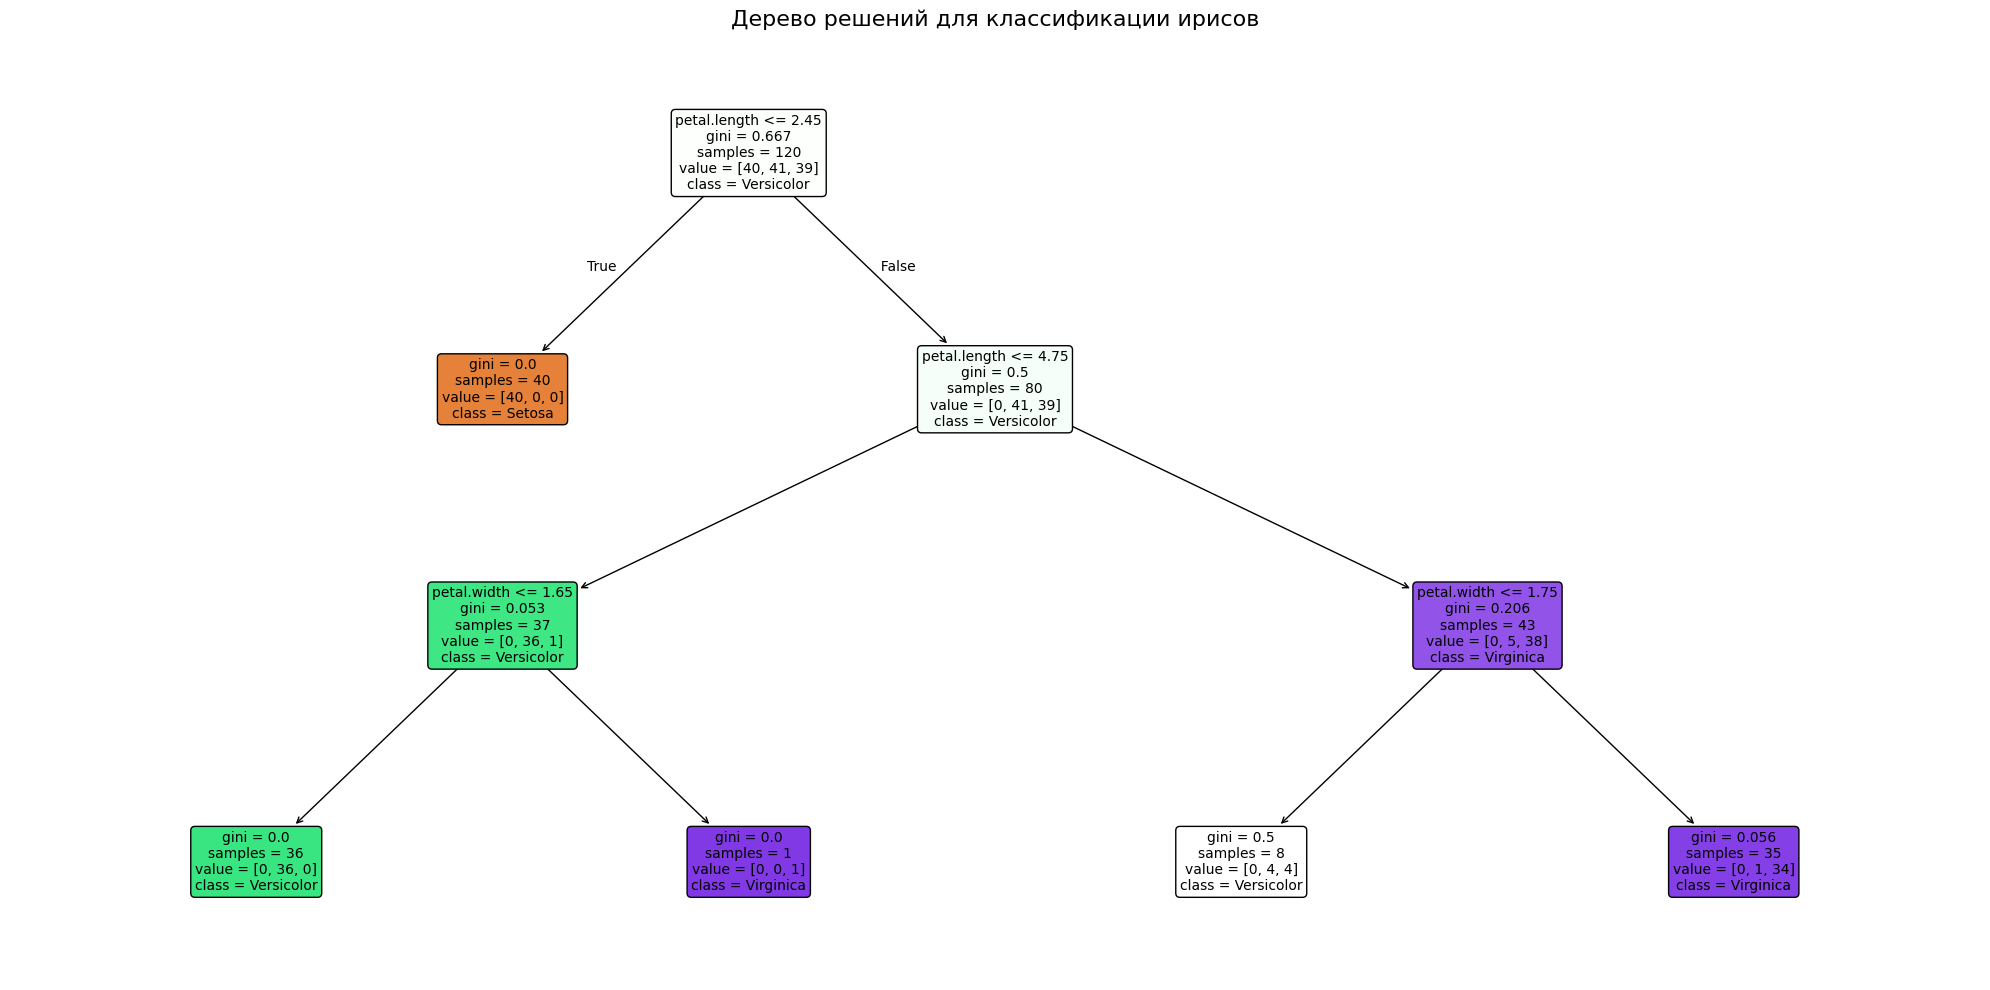

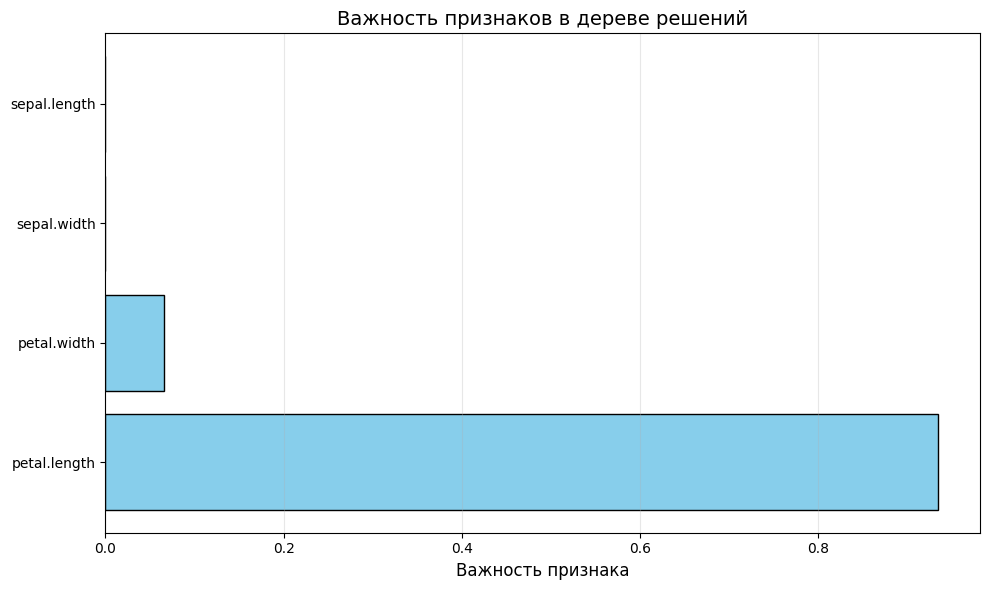


Дерево решений показало высокую точность классификации на датасете Iris.


In [3]:
# - Деревья решений для классификации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# загрузка данные Iris
df = pd.read_csv('data/iris.csv')

print("Датасет Iris:")
print(df.head())

# подготовка данных
X = df.drop('variety', axis=1).values
y = df['variety'].values
feature_names = df.drop('variety', axis=1).columns.tolist()

# тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nОбучающая выборка: {X_train.shape[0]}")
print(f"Тестовая выборка: {X_test.shape[0]}")

# дерева решений
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# прогноз
y_pred = dt_model.predict(X_test)

# оценка качества
accuracy = accuracy_score(y_test, y_pred)

print(f"\n{'='*60}")
print(f"{'='*60}")
print(f"Точность модели: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nОтчет классификации:")
print(classification_report(y_test, y_pred))

# Важность признаков
feature_importance = dt_model.feature_importances_
print(f"\nВажность признаков:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"  {feature:20s}: {importance:.4f}")

# визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=sorted(df['variety'].unique()),
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Дерево решений для классификации ирисов', fontsize=16)
plt.tight_layout()
plt.show()

# визуализация важности признаков
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], color='skyblue', edgecolor='black')
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Важность признака', fontsize=12)
plt.title('Важность признаков в дереве решений', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\nДерево решений показало высокую точность классификации на датасете Iris.")
